In [1]:
import torch
from omegaconf import OmegaConf
from data.nih_dataset import NIHDataset
from data.nih_art_detection_data_module import NIHArtDetectionDataModule

hparams = OmegaConf.load('../config/hparams/art_detection.yaml')

dm = NIHArtDetectionDataModule(
    dataset_path='/home/szymswiat/datasets/nih_dataset',
    split_type=NIHDataset.SPLIT_OFFICIAL_WITH_VAL,
    num_workers=0
)
dm.trainer = OmegaConf.create(dict(current_epoch=0))

tr_ds = dm.train_dataloader().dataset
val_ds = dm.val_dataloader().dataset
test_ds = dm.test_dataloader().dataset

tr_df = tr_ds._df
val_df = val_ds._df
test_df = test_ds._df

i = 0

/opt/anaconda3/envs/nih_cxr/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:870: UserWarning: unknown class(es) ['No Finding'] will be ignored
  warnings.warn(


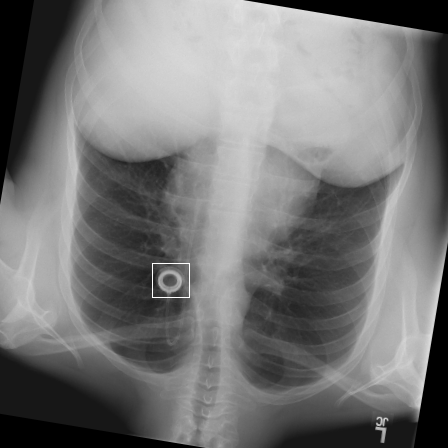

In [28]:
from torchvision.utils import draw_bounding_boxes
from imageio.plugins.pillow import ndarray_to_pil

img, target = tr_ds[i]
img = (img * 255).type(torch.uint8)
img = draw_bounding_boxes(img, torch.tensor([box[:-1] for box in target]))
i += 1

ndarray_to_pil(img.permute(1, 2, 0).detach().numpy())

In [ ]:
# replay

In [ ]:
from typing import List
from pandas import DataFrame
import numpy as np

def flat_targets(df: DataFrame):
    flat_classes = []
    flat_boxes = []
    for bbox_list in df['Bboxes_Art']:
        for bbox in bbox_list:
            flat_boxes.append(bbox[:-1])
            flat_classes.append(bbox[-1])
    return np.array(flat_boxes), np.array(flat_classes)

tr_boxes, tr_classes = flat_targets(tr_df)
val_boxes, val_classes = flat_targets(val_df)
test_boxes, test_classes = flat_targets(test_df)

tr_d = np.unique(tr_classes, return_counts=True)
val_d = np.unique(val_classes, return_counts=True)
test_d = np.unique(test_classes, return_counts=True)

In [ ]:
import plotly.express as px

for cls, cnt in [tr_d, val_d,  test_d]:
    fig = px.bar(x=cls, y=cnt)
    fig.show()

In [ ]:
tr_boxes_size = tr_boxes[..., 2:] - tr_boxes[..., :2]
aspects = tr_boxes_size[..., 0] / tr_boxes_size[..., 1]